# TPC 8

* data iní­cio: 2021-12-03
* data fim: 2021-12-06
* autor: Filipa Pinho Serra Campos, A95303
* resumo: 

In [1]:
pip install pysimplegui

Note: you may need to restart the kernel to use updated packages.


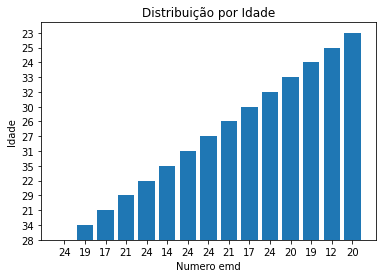

In [1]:
import PySimpleGUI as sg

# Painel com duas colunas: 
# Coluna 1: menu
# Coluna 2: Dados

menu_list_column = [
    [sg.Button("Carregar")],
    [sg.Button("Listar")],
    [sg.Button("Modalidades")],
    [sg.Button("Por modalidade")],
    [sg.Button("Por ano")],
    [sg.Button("Por Clube")],
    [sg.Button("Sair")]
]

data_viewer_column = [
    [sg.Text("Painel de Dados")],
    [sg.Text(size=(40, 1), key="-Dados-")],
]

# ----- Full layout -----
layout = [
    [
        sg.Column(menu_list_column), #vai buscar a lista do menu
        sg.VSeperator(), #separador vertical
        sg.Column(data_viewer_column), # vai buscar a lista dos dados
    ]
]

window = sg.Window("Sample App", layout)

import emdApp as emd

myBD = emd.carregar()
# Run the Event Loop
stop = False
while not stop:
    event, values = window.read()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop = True
    # Folder name was filled in, make a list of files in the folder
    elif event == "Carregar":
        contador = emd.contadorBD()
        dados = "Foram carregados " + str(contador) + " registos."
        window["-Dados-"].update(dados)
    elif event == "Listar":  
        tabela = emd.listarDataset()
        window["-Dados-"].update(tabela)
    elif event == "Modalidades":  
        modalidades = emd.modalidades()
        window["-Dados-"].update(modalidades)
    elif event == "Por modalidade":  
        modalidade = emd.porModalidade()
        window["-Dados-"].update(modalidade)
        graficoModalidade = emd.plotPorModalidade()
        window["-Dados-"].update(graficoModalidade)
    elif event == "Por ano":  
        ano = emd.porAno()
        window["-Dados-"].update(ano)
        graficoAno = emd.plotPorAno()
        window["-Dados-"].update(graficoAno)
    elif event == "Por Clube":  
        clube = emd.porClube()
        window["-Dados-"].update(clube)
        graficoClube = emd.plotPorClube()
        window["-Dados-"].update(graficoClube)
    else:
        window["-Dados-"].update("Erro: evento desconhecido")

window.close()